In [10]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from torch.utils.data import DataLoader, TensorDataset

In [11]:
# import dataset from seaborn
import seaborn as sns
iris = sns.load_dataset("iris")

# organize the data

# convert from pandas dataframe to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# transform species to number
labels = torch.zeros(len(data), dtype = torch.long)
# labels[iris.species == "setosa"] = 0 # don't need
labels[iris.species == "versicolor"] = 1
labels[iris.species == "virginica"] = 2

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [12]:
# create a fake dataset

fakedata = np.tile(np.array([1, 2, 3, 4]), (10, 1)) + np.tile(10*np.arange(1, 11), (4, 1)).T
fakelabels = np.arange(10) > 4
print(fakedata), print(" ")
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
 
[False False False False False  True  True  True  True  True]


In [13]:
# dataloader object with all data
fakedataLdr = DataLoader(fakedata, shuffle = True)
print(fakedataLdr)
print(fakedataLdr.batch_size)

1


In [14]:
for i, oneSample in enumerate(fakedataLdr):
    print(i, oneSample, oneSample.shape)

# where are the labels?

0 tensor([[51, 52, 53, 54]]) torch.Size([1, 4])
1 tensor([[91, 92, 93, 94]]) torch.Size([1, 4])
2 tensor([[71, 72, 73, 74]]) torch.Size([1, 4])
3 tensor([[61, 62, 63, 64]]) torch.Size([1, 4])
4 tensor([[41, 42, 43, 44]]) torch.Size([1, 4])
5 tensor([[81, 82, 83, 84]]) torch.Size([1, 4])
6 tensor([[21, 22, 23, 24]]) torch.Size([1, 4])
7 tensor([[11, 12, 13, 14]]) torch.Size([1, 4])
8 tensor([[31, 32, 33, 34]]) torch.Size([1, 4])
9 tensor([[101, 102, 103, 104]]) torch.Size([1, 4])


In [17]:
# we need to create a Dataset that contains the data and labels
fakeDataset = TensorDataset(torch.Tensor(fakedata), torch.Tensor(fakelabels))
print(fakeDataset.tensors), print(" ")

# create another dataloader
fakedataLdr = DataLoader(fakeDataset, shuffle = True)

# iterate thru the data
for dat, lab in fakedataLdr:
    print(dat, lab)

(tensor([[ 11.,  12.,  13.,  14.],
        [ 21.,  22.,  23.,  24.],
        [ 31.,  32.,  33.,  34.],
        [ 41.,  42.,  43.,  44.],
        [ 51.,  52.,  53.,  54.],
        [ 61.,  62.,  63.,  64.],
        [ 71.,  72.,  73.,  74.],
        [ 81.,  82.,  83.,  84.],
        [ 91.,  92.,  93.,  94.],
        [101., 102., 103., 104.]]), tensor([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]))
 
tensor([[41., 42., 43., 44.]]) tensor([0.])
tensor([[81., 82., 83., 84.]]) tensor([1.])
tensor([[101., 102., 103., 104.]]) tensor([1.])
tensor([[11., 12., 13., 14.]]) tensor([0.])
tensor([[21., 22., 23., 24.]]) tensor([0.])
tensor([[91., 92., 93., 94.]]) tensor([1.])
tensor([[51., 52., 53., 54.]]) tensor([0.])
tensor([[71., 72., 73., 74.]]) tensor([1.])
tensor([[61., 62., 63., 64.]]) tensor([1.])
tensor([[31., 32., 33., 34.]]) tensor([0.])


In [18]:
# use scikitlearn to split the data
train_data, test_data, train_labels, test_labels = train_test_split(fakedata, fakelabels, test_size = .2)

# then convert them into PyTorch Datasets
train_data = torch.utils.data.TensorDataset(
    torch.Tensor(train_data), torch.Tensor(train_labels)
)

test_data = torch.utils.data.TensorDataset(
    torch.Tensor(test_data), torch.Tensor(test_labels)
)

# finally, translate into dataloader objects
# notice the batches (see next cell)
train_loader = DataLoader(train_data, batch_size = 4)
test_loader = DataLoader(test_data)

In [19]:
# examine the contents of the dataloader (batching is an advantage of dataloader)
print("TRAINING DATA")
for batch, label in train_loader: # iterable
    print(batch, label)

print(" ")
print("TESTING DATA")
for batch, label in test_loader:
    print(batch, label)
    print(" ")

TRAINING DATA
tensor([[101., 102., 103., 104.],
        [ 91.,  92.,  93.,  94.],
        [ 31.,  32.,  33.,  34.],
        [ 51.,  52.,  53.,  54.]]) tensor([1., 1., 0., 0.])
tensor([[81., 82., 83., 84.],
        [11., 12., 13., 14.],
        [61., 62., 63., 64.],
        [21., 22., 23., 24.]]) tensor([1., 0., 1., 0.])
 
TESTING DATA
tensor([[41., 42., 43., 44.]]) tensor([0.])
 
tensor([[71., 72., 73., 74.]]) tensor([1.])
 


In [20]:
# for iris dataset

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size = .8)

# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

# finally translate into dataloader objects
train_loader = DataLoader(train_data, shuffle = True, batch_size = 12)
test_loader = DataLoader(test_data, batch_size = test_data.tensors[0].shape[0])

In [26]:
# check sizes of data batches
for X, y in train_loader:
    print(X.shape, y.shape)

# X, y

for X1, y1 in test_loader:
    print(X1.shape, y1.shape)

torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([30, 4]) torch.Size([30])


In [27]:
def createANewModel():
    # model architecture
    ANNiris = nn.Sequential(
        nn.Linear(4, 64), # input layer
        nn.ReLU(), # activation
        nn.Linear(64, 64), # hidden layer
        nn.ReLU(), # activation
        nn.Linear(64, 3) # output layer
    )
    
    # loss function
    lossfun = nn.CrossEntropyLoss() # automatically computes the softmax
    
    # optimizer
    optimizer = torch.optim.SGD(ANNiris.parameters(), lr = .01)

    return ANNiris, lossfun, optimizer

In [37]:
# train the model
numepochs = 500

def trainTheModel():
    trainAcc = []
    testAcc = []

    # train the model
    for epochi in range(numepochs):

        # loop over training data batches
        batchAcc = []
        for X, y in train_loader:

            # forward pass and loss
            yHat = ANNiris(X)
            loss = lossfun(yHat, y)

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # compute training accuracy just for this batch
            batchAcc.append(100 * torch.mean((torch.argmax(yHat, axis=1) == y).float()).item())

        # now that we've trained through the batches, get avg training accuracy
        trainAcc.append(np.mean(batchAcc))

        # test accuracy
        X, y = next(iter(test_loader))  # extract X, y from test dataloader
        predlabels = torch.argmax(ANNiris(X), axis=1)
        testAcc.append(100 * torch.mean((predlabels == y).float()).item())

    # function output
    return trainAcc, testAcc

In [38]:
# create a model
ANNiris, lossfun, optimizer = createANewModel()

# train the model
trainAcc, testAcc = trainTheModel()

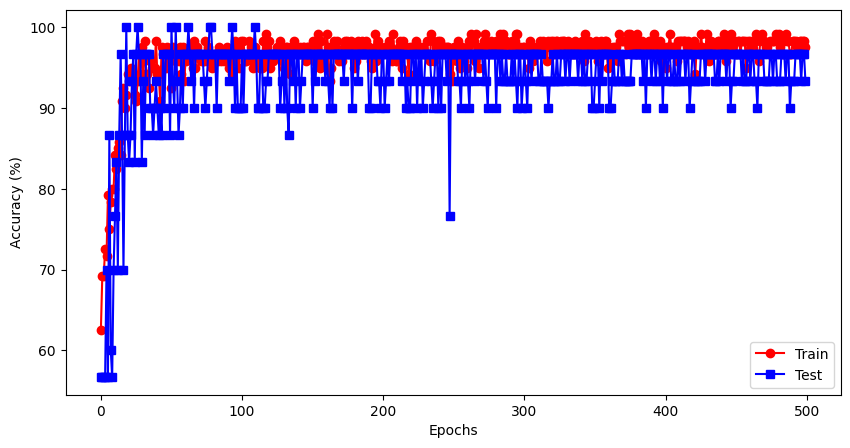

In [39]:
# plot the results
fig = plt.figure(figsize = (10, 5))

plt.plot(trainAcc, "ro-")
plt.plot(testAcc, "bs-")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend(["Train", "Test"])
plt.show()